## Notebooks Import

In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,r2_score,roc_auc_score
from sklearn.tree import DecisionTreeRegressor , export_graphviz
from sklearn.externals.six import StringIO 

import statsmodels.api as sm
import pydotplus as pdot
from IPython.display import Image
 
%matplotlib inline

In [32]:
data = pd.read_csv('petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [33]:
X = data.drop(['Petrol_Consumption'] , axis =1)
Y = data.Petrol_Consumption

In [34]:
X_train , X_test , y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

In [35]:
regression_tree = DecisionTreeRegressor(max_depth=3)

In [36]:
regression_tree.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=3)

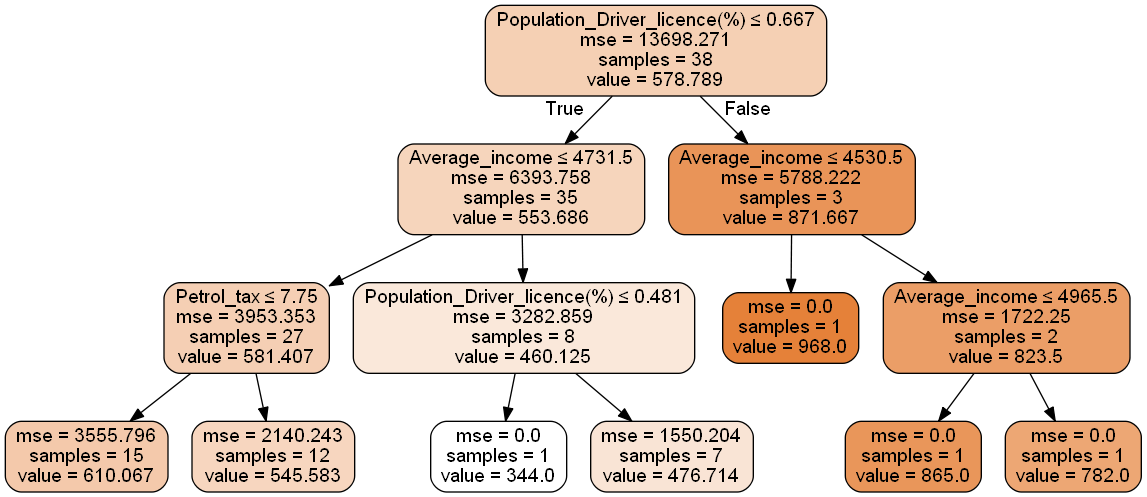

In [41]:
dot_data = StringIO()
export_graphviz(regression_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pdot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Evaluation

In [37]:
y_predict = regression_tree.predict(X_test)

In [38]:
pd.DataFrame({'Actual':y_test , 'Predicted':y_predict})

,Actual,Predicted
27,631,610.066667
40,587,610.066667
26,577,545.583333
43,591,610.066667
24,460,545.583333
37,704,610.066667
12,525,476.714286
19,640,968.000000
4,410,545.583333
25,566,545.583333


In [39]:
#MSE
MSE = mean_squared_error(y_test,y_predict)
MSE

14718.398909297053

In [40]:
#RMSE
RMSE = np.sqrt(MSE)
RMSE

121.31940862573083